Дана карта с целями, координаты целей записаны в файле в целочисленном формате
Задача: навести ракету с радиусом поражения r так, чтобы количество поражённых объектов было максимально

In [105]:
r = int(input('Введите радиус поражения ракеты:'))

Введите радиус поражения ракеты: 8


In [202]:
cords={}
with open("coords.txt", "r") as file:
        content=file.read()
        j = 0
        for i in content.split('\n'):
            j += 1
            c = tuple(map(int, i.split(',')))
            cords[j] = c

In [203]:
if len(cords) == 0:
    print("Целей не обнаружено")
elif len(cords) == 1:
    target = cords[1]
    maxim = 1
elif len(cords) == 2:
    if (cords[1][0] - cords[2][0])**2 + (cords[1][1] - cords[2][1])**2 > (2*r)**2:
        target = cords[1]     
        maxim = 1

Посчитаем расстояния между точками

In [204]:
def dist(a, b):
    d = [a[0] - b[0], a[1] - b[1]]
    return (d[0] * d[0] + d[1] * d[1]) 

D = {}

for city1, cords1 in cords.items():
    D[city1] = {}
    for city2, cords2 in cords.items():
        if city2 != city1: D[city1][city2] = dist(cords1, cords2)   

dist = []        
for city1, v in D.items():
    for city2, d in v.items():
        dist.append((city1, city2, d))

In [205]:
min_dist = sorted(dist, key=lambda attr: attr[2], reverse = True) 

In [206]:
min_dist2 = list(filter(lambda x: (0 < x[2] <= (2*r)**2), min_dist))

Найдем пары точек с расстоянием меньше, чем диаметр в квадрате ( так как мы не извлекали корень в формуле расстояния)

In [207]:
from math import sqrt
maxim = 0

In [208]:
for i, j, k in min_dist2:
    horda = [cords[i], cords[j]]
    x1 = horda[0][0]; x2 = horda[1][0]
    y1 = horda[0][1]; y2 = horda[1][1]
    #d = sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))
    d = sqrt(k)
    h = sqrt(r * r - (d/2) * (d/2));

    x01 = x1 + (x2 - x1)/2 + h * (y2 - y1) / d
    y01 = y1 + (y2 - y1)/2 - h * (x2 - x1) / d

    x02 = x1 + (x2 - x1)/2 - h * (y2 - y1) / d
    y02 = y1 + (y2 - y1)/2 + h * (x2 - x1) / d
    
    cnt1 = 0; cnt2 = 0
    
    for i in cords:
        if (cords[i][0] - x01)**2 + (cords[i][1] - y01)**2  <= r**2:
            cnt1 += 1
        elif (cords[i][0] - x02)**2 + (cords[i][1] - y02)**2  <= r**2:
            cnt2 += 1
    if cnt1 > maxim: delt = cnt1-maxim; maxim = cnt1; target = (x01, y01); print('Улучаем поражение на', delt, 'целей')
    elif cnt2 > maxim: delt = cnt2-maxim; maxim = cnt2; target = (x02, y02); print('Улучаем поражение на', delt, 'целей')
    for i in range(2):
        if target[i] < 0: target[i] = 0
print('Наведение ракеты завершено')

Улучаем поражение на 4 целей
Улучаем поражение на 1 целей
Наведение ракеты завершено


x01, y01; x02, y02 - центры окружностей

In [209]:
print('Координаты цели', target)
print('Число поражённых целей', maxim)

Координаты цели (52.670329308849006, 44.27289425486799)
Число поражённых целей 5


In [212]:
xx = []
yy = []
for i in cords:
    xx.append(cords[i][0])
    yy.append(cords[i][1])  

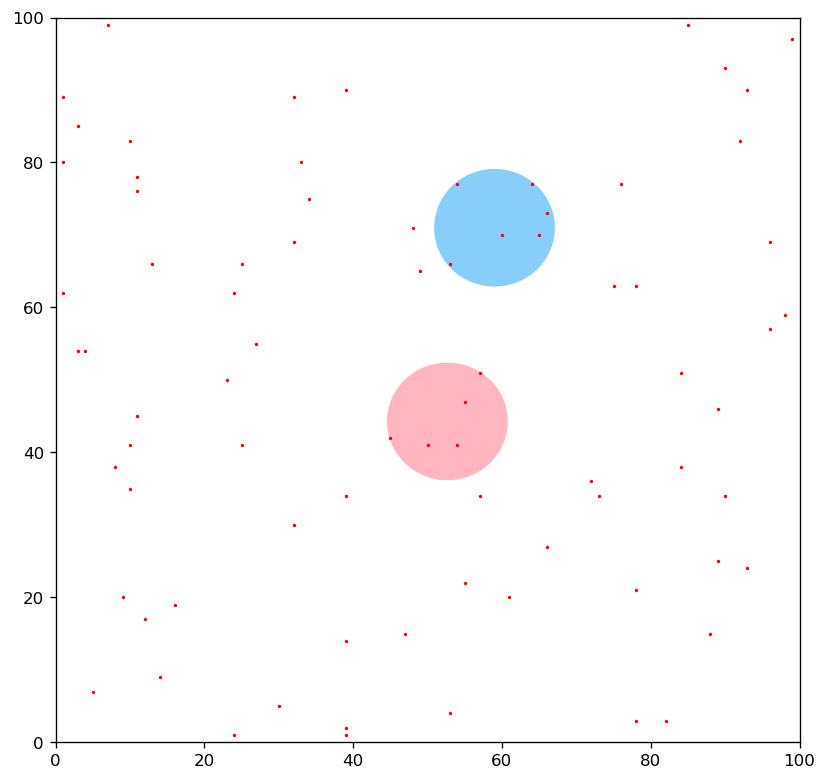

In [213]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8), dpi=120)
plt.axis([0, 100, 0, 100])
plt.plot(xx, yy, 'o', color='red', markersize= 1)
v=plt.Circle (target, radius = r, color = 'lightpink')
d=plt.Circle ((59, 71), radius = r, color = 'lightskyblue')
plt.gca ().add_artist (v)
plt.gca ().add_artist (d)
plt.show()